In [24]:
import nltk
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file_names = gutenberg.fileids()
file_names

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print(doc_alice[:500])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [9]:
token_alice = word_tokenize(doc_alice)
print(len(token_alice))
print(token_alice[:20])

33494
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [12]:
lemma = WordNetLemmatizer()
lemma_token_alice = [lemma.lemmatize(token) for token in token_alice]
lemma_token_alice[:20]

['[',
 'Alice',
 "'s",
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'Lewis',
 'Carroll',
 '1865',
 ']',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit-Hole',
 'Alice',
 'wa',
 'beginning']

In [13]:
tokenizer = RegexpTokenizer("[\w']{3,}")
re_token_alice = tokenizer.tokenize(doc_alice.lower())
print(len(re_token_alice))
print(re_token_alice[:20])

21616
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


In [18]:
english_stops = set(stopwords.words('english'))
result_alice = [word for word in re_token_alice if word not in english_stops]
print(len(result_alice))
print(result_alice[:30])

12999
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', "'and", 'use', 'book', 'thought', 'alice', "'without"]


In [17]:
lemma = WordNetLemmatizer()
lemma_token_alice = [lemma.lemmatize(word) for word in result_alice]
print(len(lemma_token_alice))
print(lemma_token_alice[:30])

12999
["alice's", 'adventure', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'picture', 'conversation', "'and", 'use', 'book', 'thought', 'alice', "'without"]


In [19]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
print(len(alice_word_count))

2687


In [20]:
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

In [21]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

In [22]:
alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
print(len(alice_word_count))

1726


In [23]:
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)
for key in sorted_word_count[:20]:
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

'said': 462, 'alice': 293, 'little': 124, 'went': 83, 'time': 71, 'queen': 66, 'began': 58, 'way': 56, 'turtle': 56, 'mock': 55, 'thought': 54, 'thing': 49, 'voice': 48, 'head': 46, 'gryphon': 45, 'got': 44, 'rabbit': 42, 'looked': 42, 'see': 42, 'came': 40, 

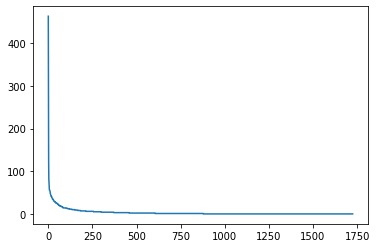

In [25]:
w = [alice_word_count[key] for key in sorted_word_count]
plt.plot(w)

<BarContainer object of 20 artists>

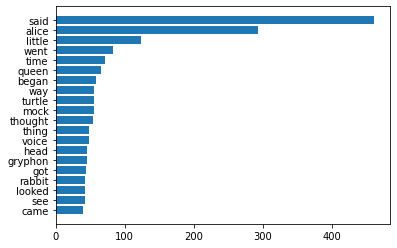

In [27]:
n = sorted_word_count[:20][::-1]
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)), w, tick_label=n)